In [53]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [4]:
customers_df['join_date'] = pd.to_datetime(customers_df['join_date'])
customers_df['last_purchase_date'] = pd.to_datetime(customers_df['last_purchase_date'])

In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [6]:
#Convert trasaction_date to datetime, product_category to category
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['product_category'] = transactions_df['product_category'].astype('category')

In [7]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [8]:
#Convert campaign_date data type to date in marketing_df
marketing_df['campaign_date'] = pd.to_datetime(marketing_df['campaign_date'])

In [9]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [10]:
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [11]:
customers_df.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [12]:
marketing_df.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [13]:
engagement_df.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [14]:
transactions_df.isnull().sum()/100 

transaction_id        0.0
customer_id           0.0
transaction_date      0.0
transaction_amount    0.0
product_category      0.0
dtype: float64

In [15]:
marketing_df.isnull().sum()/100 

campaign_id       0.0
customer_id       0.0
response          0.0
promotion_type    0.0
campaign_date     0.0
dtype: float64

In [16]:
engagement_df.isnull().sum()/100 

customer_id                0.0
number_of_site_visits      0.0
number_of_emails_opened    0.0
number_of_clicks           0.0
dtype: float64

In [17]:
customers_df.isnull().sum()/100 

customer_id            0.00
join_date              0.00
last_purchase_date     0.00
age                   10.09
gender                 5.33
location               0.00
dtype: float64

In [18]:
#Impute missing values in the age column with the median
customers_df['age'].fillna(customers_df['age'].median(), inplace=True)
#Fill in the missing values in the gender column with 'Unknown'
customers_df['gender'].fillna('Unknown', inplace=True)

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_11552/1859736587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['age'].fillna(customers_df['age'].median(), inplace=True)
/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_11552/1859736587.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [19]:
customers_df.isnull().sum()/100 

customer_id           0.0
join_date             0.0
last_purchase_date    0.0
age                   0.0
gender                0.0
location              0.0
dtype: float64

<Axes: ylabel='transaction_amount'>

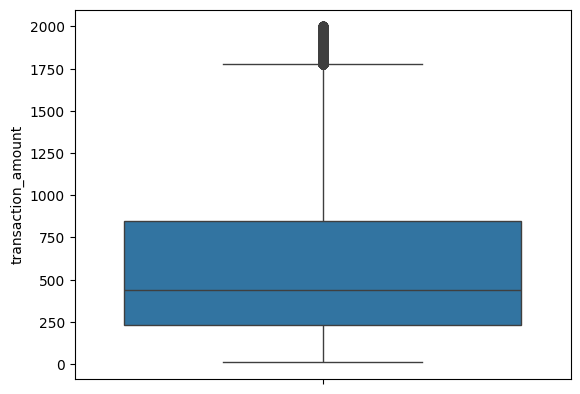

In [20]:
sns.boxplot(y='transaction_amount',data=transactions_df)

<Axes: xlabel='product_category', ylabel='Count'>

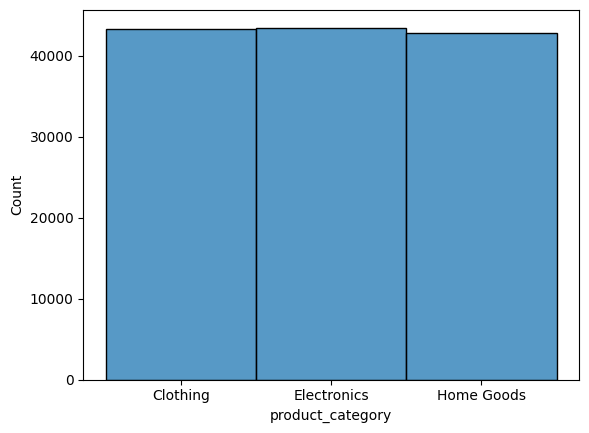

In [21]:
sns.histplot(x='product_category',data=transactions_df)

<Axes: xlabel='number_of_site_visits', ylabel='Count'>

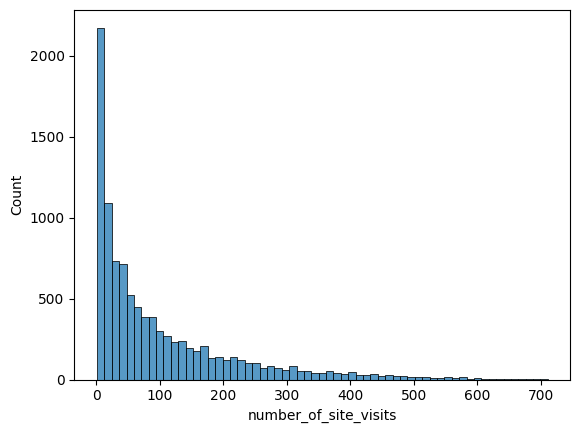

In [22]:
sns.histplot(engagement_df['number_of_site_visits'])

<Axes: xlabel='number_of_emails_opened', ylabel='Count'>

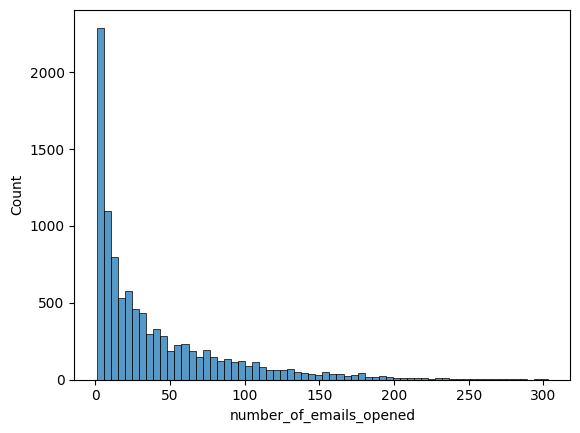

In [23]:
sns.histplot(engagement_df['number_of_emails_opened'])

<Axes: xlabel='number_of_clicks', ylabel='Count'>

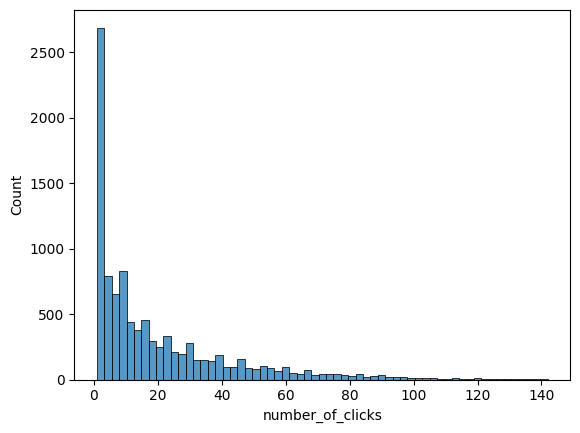

In [24]:
sns.histplot(engagement_df['number_of_clicks'])

<Axes: xlabel='age', ylabel='Count'>

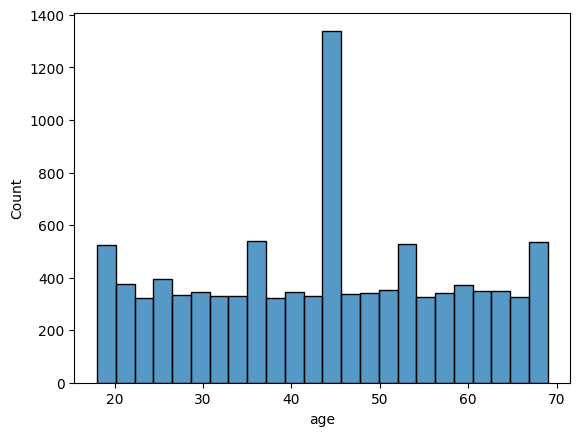

In [25]:
sns.histplot(customers_df['age'])

In [26]:
marketing_agg = marketing_df[marketing_df['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

In [27]:
transactions_agg = transactions_df.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [28]:
# step 3: set customers and engagement index as customer_id
customers_df.set_index('customer_id', inplace=True)
engagement_df.set_index('customer_id', inplace=True)

In [29]:
joint_data = customers_df.join(engagement_df).join(transactions_agg).join(marketing_agg)

In [30]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0


In [31]:
joint_data['customer_lifetime'] = (joint_data['last_purchase_date'] - joint_data['join_date']).dt.days

In [32]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,customer_lifetime
customer_id,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,118
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,777
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,544
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,243
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,494
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,240
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,200
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,135


In [33]:
gender_dummies = pd.get_dummies(joint_data['gender'], dtype=int)

In [34]:
gender_dummies

,Female,Male,Unknown
customer_id,,,
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0
...,...,...,...
9996,1,0,0
9997,0,1,0
9998,0,1,0


In [35]:
#addig back to the dataframe
joint_data = pd.concat([joint_data, gender_dummies], axis=1)

In [36]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,customer_lifetime,Female,Male,Unknown
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,118,1,0,0
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,777,0,1,0
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,544,0,0,1
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,243,0,1,0
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,494,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,240,1,0,0
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,200,0,1,0
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,135,0,1,0


In [37]:
#RFM model to assess recency, and frequency of each customer
# Calculate recency
latest_date = transactions_df['transaction_date'].max()
recency = transactions_df.groupby('customer_id')['transaction_date'].max().reset_index()
recency['recency'] = (latest_date - recency['transaction_date']).dt.days
recency.drop(columns='transaction_date', inplace=True)

# Calculate frequency
frequency = transactions_df.groupby('customer_id')['transaction_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Monetary: Total amount spent by the customer
#monetary_df = transactions_df.groupby('customer_id')['transaction_amount'].sum().reset_index(name='monetary')
#customers_df = customers_df.merge(monetary_df, on='customer_id', how='left').fillna(0)

# Merge RFM metrics
rfm_df = pd.merge(recency, frequency, on='customer_id')

In [38]:
rfm_df

,customer_id,recency,frequency
0,1,80,6
1,2,460,9
2,3,560,6
3,4,639,20
4,5,365,24
...,...,...,...
9995,9996,355,10
9996,9997,540,12
9997,9998,151,3
9998,9999,687,12


In [41]:
rfm_df.set_index('customer_id', inplace=True)

In [42]:
joint_data = joint_data.join(rfm_df)

In [43]:
# Calculate RFM Scores
joint_data['recency_score'] = pd.qcut(joint_data['recency'], 5, labels=False, duplicates='drop')
joint_data['frequency_score'] = pd.qcut(joint_data['frequency'].rank(method='first'), 5, labels=False)
joint_data['monetary_score'] = pd.qcut(joint_data['transaction_amount'], 5, labels=False, duplicates='drop')

# Combine RFM Scores into a single score
joint_data['rfm_score'] = joint_data['recency_score'] + joint_data['frequency_score'] + joint_data['monetary_score']

In [44]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,...,customer_lifetime,Female,Male,Unknown,recency,frequency,recency_score,frequency_score,monetary_score,rfm_score
customer_id,,,,,,,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,...,118,1,0,0,80,6,0,0,1,1
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,...,777,0,1,0,460,9,2,1,2,5
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,...,544,0,0,1,560,6,3,0,0,3
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,...,243,0,1,0,639,20,3,3,2,8
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,...,494,0,1,0,365,24,2,4,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,...,240,1,0,0,355,10,2,2,1,5
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,...,200,0,1,0,540,12,3,2,1,6
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,...,135,0,1,0,151,3,1,0,1,2


In [63]:
# Prepare the data for OLS regression
# Select features and target variable
features = ['recency', 'frequency', 'transaction_amount', 'age', 'Female', 'Male','Unknown', 'customer_lifetime']
target = 'rfm_score'

# Split the data into training and test sets
X = joint_data[features]
y = joint_data[target]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Summary of the OLS regression
ols_summary = ols_model.summary()

ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rfm_score   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 2.517e+04
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:21:04   Log-Likelihood:                -10490.
No. Observations:               10000   AIC:                         2.100e+04
Df Residuals:                    9992   BIC:                         2.105e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4436      0.022    -20.063      0.000      -0.487      -0.400
recency                0.0037   1.93e-05    190.506      0.000       0.004       0.004
frequency              0.2242      0.002     89.929      0.000       0.219       0.229
transaction_amount     0.0002   3.87e-06     63.864      0.000       0.000       0.000
age                    0.0001      0.000      0.252      0.801      -0.001       0.001
Female                -0.1639      0.013    -12.690      0.000      -0.189      -0.139
Male                  -0.1531      0.013    -11.860      0.000      -0.178      -0.128
Unknown               -0.1266      0.024     -5.344      0.000      -0.173      -0.080
customer_lifetime      0.0003   1.94e-05     15.851      0.000       0.000       0.000
==============================================================================
Omnibus:                      138.267   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.240
Skew:                          -0.284   Prob(JB):                     4.77e-32
Kurtosis:                       3.152   Cond. No.                     1.58e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(joint_data[features], joint_data[target], test_size=0.3, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# KNN Regressor Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

results = {
    'Model': ['Linear Regression', 'KNN Regressor'],
    'Mean Squared Error': [linear_mse, knn_mse],
    'R-squared': [linear_r2, knn_r2]
}

results_df = pd.DataFrame(results)
results_df

,Model,Mean Squared Error,R-squared
0,Linear Regression,0.465332,0.948656
1,KNN Regressor,0.504667,0.944316
